## Observations and Insights 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results)
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [94]:
# Checking the number of mice.
total_mice = merged_df['Mouse ID'].nunique()
total_mice

249

In [95]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_df[merged_df.duplicated(["Mouse ID"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [96]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.drop(merged_df[merged_df["Mouse ID" ]== "z969"].index, inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = merged_df['Mouse ID'].count()
new_total_mice

#unique mice
unique_mice = merged_df['Mouse ID'].nunique()
unique_mice


248

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regime_grouped = merged_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tvol = regime_grouped['Tumor Volume (mm3)']

tvol_mean = tvol.mean()
tvol_mean

tvol_median = tvol.median()
tvol_median

tvol_var = tvol.var()
tvol_var

tvol_std = tvol.std()
tvol_std

###### Assemble the resulting series into a single summary dataframe. ????
summary_stats_df = pd.DataFrame({"Mean": tvol_mean, 
                                    "Median": tvol_median,
                                    "Variance": tvol_var,
                                     "Standard Deviation" : tvol_std})


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df = pd.DataFrame({"Mean": tvol_mean, 
                                    "Median": tvol_median,
                                    "Variance": tvol_var,
                                     "Standard Deviation" : tvol_std})
summary_stats_df
###### Using the aggregation method, produce the same summary statistics in a single line ????


,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,53.998435,51.938261,63.012382,7.938034
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

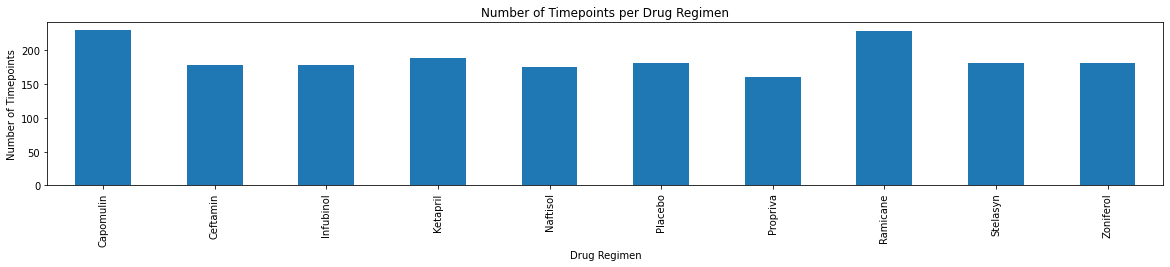

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#set variables
timepoint = regime_grouped['Timepoint']
drug_names = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
total_timepoint = timepoint.count()
x_values1 = range(len(total_timepoint))
tick_locations = [value for value in x_values1]

#create bar graph
total_timepoint.plot(kind="bar", figsize=(20,3))
plt.title("Number of Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")

Text(0, 0.5, 'Number of Timepoints')

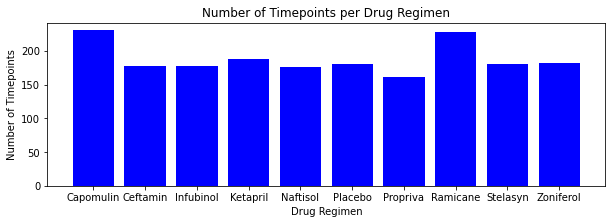

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(10,3))
plt.bar(x_values1, total_timepoint, color='blue', align="center")
plt.xticks(tick_locations, drug_names)
plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")


Text(0, 0.5, ' ')

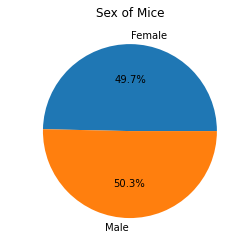

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#make new df based on sex
sex_grouped = merged_df.groupby('Sex')
mouse_ID = sex_grouped['Mouse ID']
sex = mouse_ID.count()
sex

sex.plot(kind="pie", autopct='%1.1f%%', title='Sex of Mice')
plt.ylabel(" ")
#######fix percentages

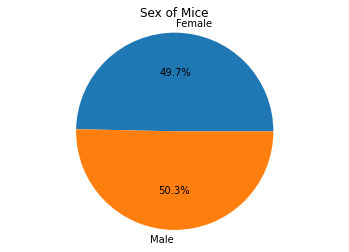

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Sex of Mice")
plt.pie(sex, labels=['Female', 'Male'],
        autopct="%1.1f%%")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
id_grouped = merged_df.groupby('Mouse ID')
greatest_tp = id_grouped['Timepoint'].max()
greatest_tp_df = pd.DataFrame(greatest_tp)
greatest_tp_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tp_df = pd.merge(merged_df, greatest_tp_df, on=['Timepoint',"Mouse ID"])
final_tp_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z234,Naftisol,Female,19,27,5,46.129357,1
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3


In [106]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

drug_t_val = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_regimen:
    t_vol2 = final_tp_df[final_tp_df["Drug Regimen"] == drug]['Tumor Volume (mm3)']
    drug_t_val.append(t_vol2)
    
drug_t_val
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

[1      23.343598
 2      28.484033
 3      28.430964
 6      30.485985
 10     31.023923
 12     31.896238
 13     32.377357
 14     33.329098
 16     34.455298
 20     37.311846
 22     36.041047
 24     37.074024
 28     38.846876
 30     38.939633
 31     38.982878
 32     38.753265
 34     38.125164
 35     39.952347
 36     40.658124
 37     40.159220
 38     40.728578
 39     41.483008
 40     41.581521
 45     47.685963
 181    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 0     22.050126
 4     29.128472
 5     30.276232
 7     30.564625
 8     30.638696
 9     31.560470
 11    31.095335
 15    33.397653
 17    32.978522
 18    33.562402
 19    36.134852
 21    38.810366
 23    37.225650
 25    36.374510
 26    36.561652
 27    37.311236
 29    38.342008
 33    38.407618
 41    40.659006
 42    40.667713
 43    45.220869
 44    43.047543
 46    43.419381
 47    43.166373
 48    44.183451
 Name: Tumor Volume (mm3), dtype: float64,
 49     67.973419
 50     65.525743
 57

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

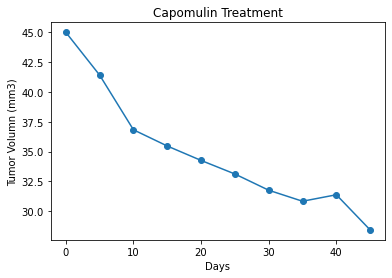

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = merged_df[merged_df['Mouse ID'] == 'm601']
mouse
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel('Days')
plt.ylabel('Tumor Volumn (mm3)')
plt.title('Capomulin Treatment')
plt.show()

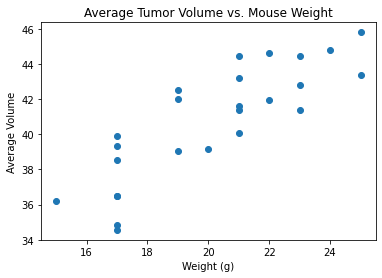

In [91]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#pull out Capomulin
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
capomulin_df

#group by Mouse ID
copomulin_grouped = capomulin_df.groupby('Mouse ID')

#find average tumor volume
avg_volume = copomulin_grouped['Tumor Volume (mm3)'].mean()
avg_volume

#merge databases
avg_volume = pd.merge(capomulin_df, avg_volume, on='Mouse ID')
avg_volume

#create new df
final_volume = avg_volume[['Weight (g)', 'Tumor Volume (mm3)_y']].drop_duplicates()
final_volume

x_values = final_volume['Weight (g)']
y_values = final_volume['Tumor Volume (mm3)_y']
plt.scatter(x_values, y_values)

plt.xlabel("Weight (g)")
plt.ylabel("Average Volume")
plt.title('Average Tumor Volume vs. Mouse Weight')

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#???????

In [77]:
x_values = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
y_values = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()